In [1]:
# libraries
require(eulerr)

Loading required package: eulerr



In [2]:
input_dir <- "inputs/"

Load data.

In [3]:
genes_curated <- read.csv(paste0(input_dir,"genes_curated.csv")
                          ,check.names=FALSE
                          ,row.names = 2
                         )
genes_curated <- genes_curated[,-1]

genes_curated[genes_curated == "True"] <- TRUE
genes_curated[genes_curated == "False"] <- FALSE

genes_curated <- as.data.frame(apply(genes_curated,2,as.logical))

print(str(genes_curated))

'data.frame':	2070 obs. of  3 variables:
 $ community: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ CPDB     : logi  FALSE FALSE FALSE FALSE TRUE TRUE ...
 $ NicheNet : logi  FALSE FALSE FALSE FALSE TRUE TRUE ...
NULL


In [4]:
genes_curated_predicted <- read.csv(paste0(input_dir,"genes_curated_predicted.csv")
                                    ,check.names=FALSE
                                    ,row.names = 2
                                    )
genes_curated_predicted <- genes_curated_predicted[,-1]

genes_curated_predicted[genes_curated_predicted == "True"] <- TRUE
genes_curated_predicted[genes_curated_predicted == "False"] <- FALSE

genes_curated_predicted <- as.data.frame(apply(genes_curated_predicted,2,as.logical))

print(str(genes_curated_predicted))

'data.frame':	2628 obs. of  3 variables:
 $ community: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ CPDB     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ NicheNet : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
NULL


In [5]:
pairs_curated <- read.csv(paste0(input_dir,"pairs_curated.csv")
                          ,check.names=FALSE
                          ,row.names = 2
                          )
pairs_curated <- pairs_curated[,-1]

pairs_curated[pairs_curated == "True"] <- TRUE
pairs_curated[pairs_curated == "False"] <- FALSE

pairs_curated <- as.data.frame(apply(pairs_curated,2,as.logical))

print(str(pairs_curated))

'data.frame':	5553 obs. of  3 variables:
 $ community: logi  TRUE TRUE FALSE TRUE FALSE FALSE ...
 $ CPDB     : logi  TRUE FALSE TRUE FALSE TRUE TRUE ...
 $ NicheNet : logi  TRUE TRUE FALSE FALSE FALSE FALSE ...
NULL


In [6]:
pairs_curated_predicted <- read.csv(paste0(input_dir,"pairs_curated_predicted.csv")
                                    ,check.names=FALSE
                                    ,row.names = 2
                                    )
pairs_curated_predicted <- pairs_curated_predicted[,-1]

pairs_curated_predicted[pairs_curated_predicted == "True"] <- TRUE
pairs_curated_predicted[pairs_curated_predicted == "False"] <- FALSE

pairs_curated_predicted <- as.data.frame(apply(pairs_curated_predicted,2,as.logical))

print(str(pairs_curated_predicted))

'data.frame':	17445 obs. of  3 variables:
 $ community: logi  TRUE TRUE FALSE FALSE TRUE FALSE ...
 $ CPDB     : logi  TRUE FALSE FALSE FALSE FALSE TRUE ...
 $ NicheNet : logi  TRUE TRUE TRUE TRUE FALSE FALSE ...
NULL


# Visualize

In [7]:
plot_euler <- function(data){
    int_list <- list(community = rownames(data)[data$community]
                    ,NicheNet = rownames(data)[data$NicheNet]
                    ,CellPhoneDB = rownames(data)[data$CPDB]
                    )

    # add numbers to the names
    numbers <- c(sum(data$community)
                ,sum(data$NicheNet)
                ,sum(data$CPDB)
                )
    names(int_list) <- paste0(names(int_list),"\n","(",numbers,")")

    plot(euler(int_list)
         ,fills = c(community = "darkolivegreen4"
                    ,NicheNet = "gold3"
                    ,CellPhoneDB = "cornsilk4"
                   )
         ,alpha=c(1,0.5,0.5)
         ,quantities = list(fontsize = 12)
        )
}

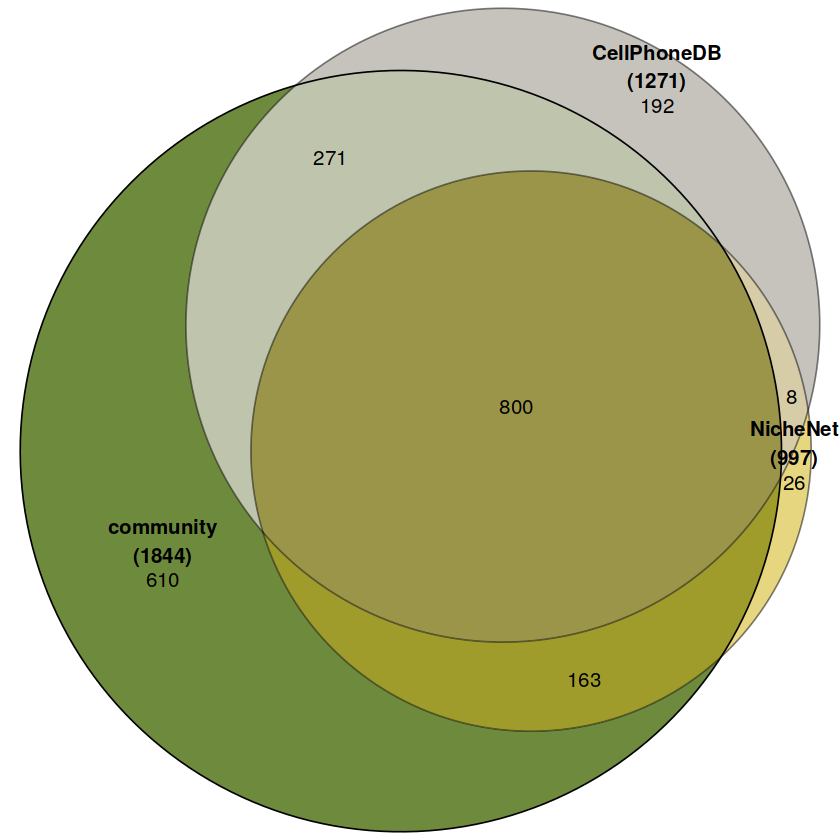

In [8]:
plot_euler(genes_curated)

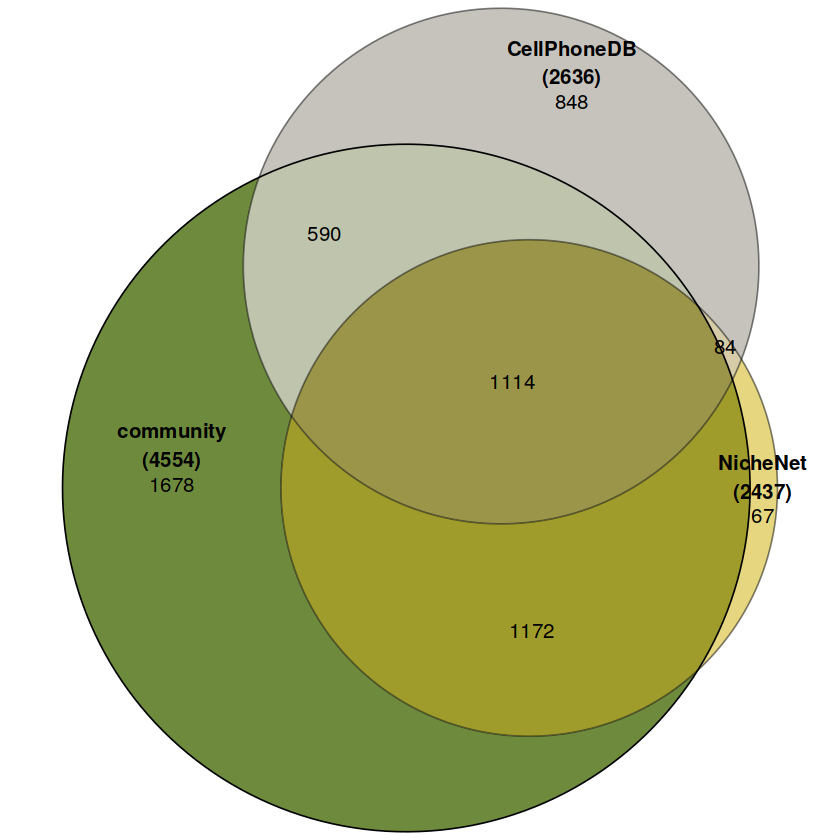

In [9]:
plot_euler(pairs_curated)

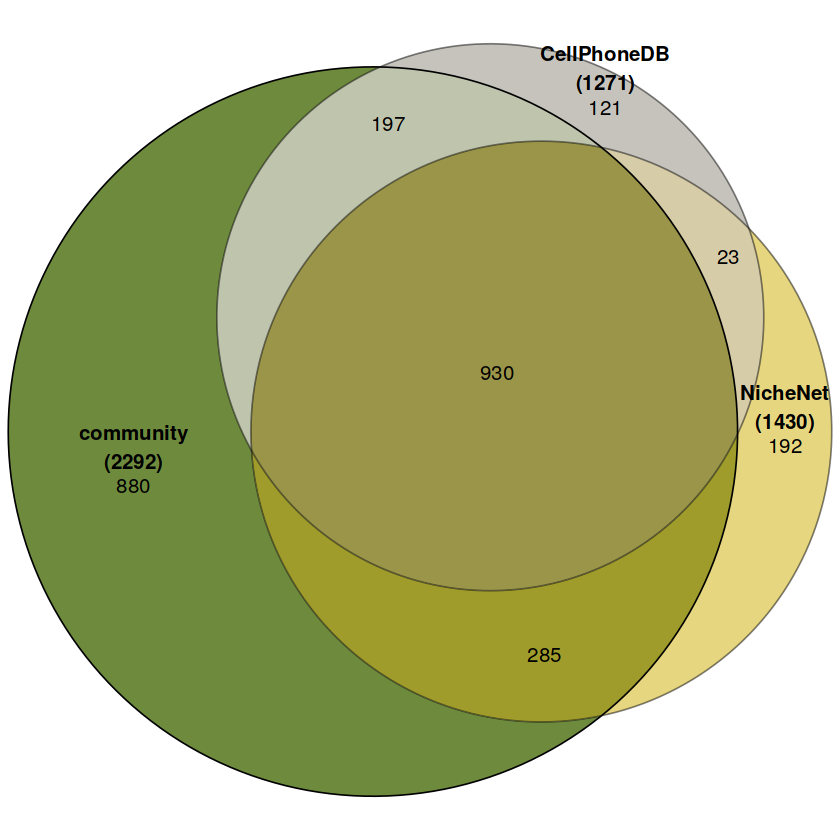

In [10]:
plot_euler(genes_curated_predicted)

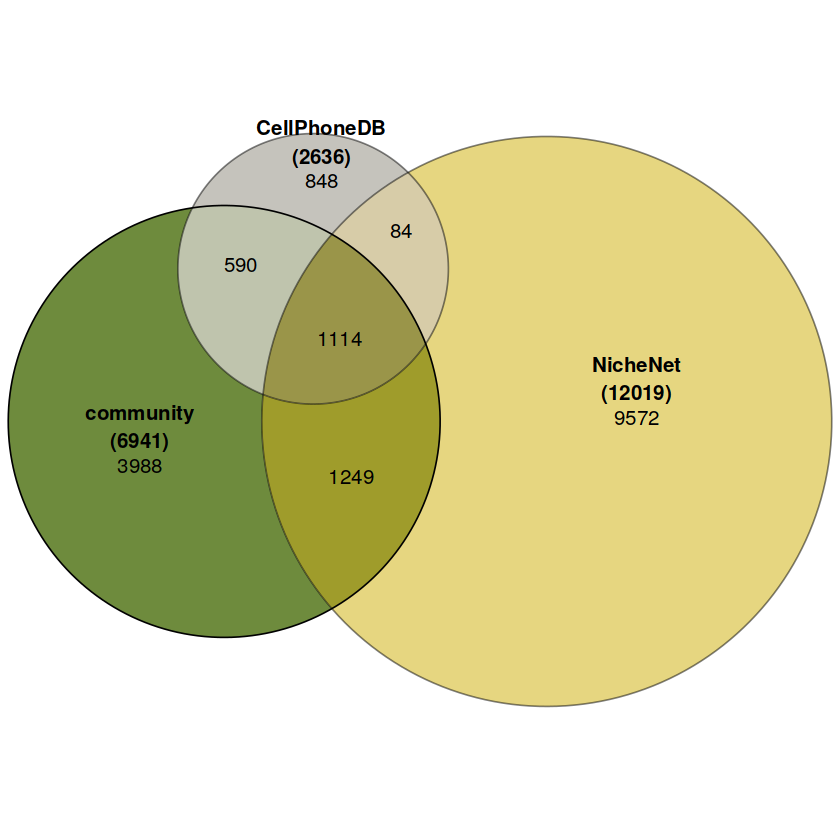

In [11]:
plot_euler(pairs_curated_predicted)

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/mami/anaconda3/envs/NicheNet/lib/libopenblasp-r0.3.26.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.34   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle_1.0.4 cli_3.6.2       fansi_1.0.6     vctrs_0.6.5    
